In [6]:
import numpy as np
import os
from multiprocessing.pool import Pool
import urllib
import progressbar
import subprocess

# Retreive semantics

In [2]:
class MyProgressBar():
    def __init__(self):
        self.pbar = None

    def __call__(self, block_num, block_size, total_size):
        if not self.pbar:
            self.pbar=progressbar.ProgressBar(maxval=total_size)
            self.pbar.start()

        downloaded = block_num * block_size
        if downloaded < total_size:
            self.pbar.update(downloaded)
        else:
            self.pbar.finish()

In [3]:
rootdir = '/scratch/shantanu/scannet/'
outdir = os.path.join(rootdir, 'semantics')

In [ ]:
scans = sorted(os.listdir(os.path.join(rootdir, 'imgs')))
print(len(scans))
print(scans[:5])

In [ ]:
def fetch_and_extract(scan):
    url = f'http://datasets.rrc.iiit.ac.in:8080/datasets/ScanNet/v2/scans/{scan}/{scan}_2d-label.zip'
    savepath = os.path.join(outdir, scan, f'{scan}_2d-label.zip')
    os.makedirs(os.path.dirname(savepath), exist_ok=True)

    response = urllib.request.urlretrieve(url, savepath, MyProgressBar())
    
#     subprocess.run(["unzip", "-o", savepath, "-d", os.path.dirname(savepath)], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
#     subprocess.run(["rm", "-rf", savepath], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)

In [ ]:
with Pool(processes=10) as pool:
    pool.map(fetch_and_extract, scans)

# Parse .sens file to get rgb and depth data

In [4]:
eigenclass_to_id = {'Bed': 1, 'Books': 2, 'Ceiling': 3, 'Chair': 4, 'Floor': 5, 'Furniture': 6, 'Objects': 7, 'Picture': 8, 'Sofa': 9, 'Table': 10, 'TV': 11, 'Wall': 12, 'Window': 13}

In [5]:
map_to_eigen13 = {1: 12, 2: 4, 22: 2, 3: 5, 5: 12, 1163: 7, 16: 13, 4: 10, 56: 6, 13: 7, 15: 8, 41: 3, 26: 7, 161: 12, 19: 7, 7: 6, 9: 10, 8: 6, 10: 4, 31: 7, 6: 9, 14: 7, 48: 7, 28: 7, 11: 1, 18: 6, 71: 7, 21: 13, 40: 7, 52: 7, 96: 6, 29: 6, 49: 7, 23: 4, 63: 7, 24: 10, 17: 7, 47: 7, 32: 7, 46: 7, 65: 7, 97: 6, 34: 6, 38: 7, 33: 11, 75: 6, 36: 6, 64: 7, 101: 7, 130: 7, 27: 6, 44: 10, 131: 7, 55: 7, 42: 7, 59: 7, 159: 6, 74: 4, 82: 7, 1164: 6, 93: 7, 77: 7, 67: 6, 128: 12, 50: 7, 35: 6, 69: 7, 100: 7, 62: 7, 105: 7, 1165: 12, 165: 6, 76: 7, 230: 7, 54: 7, 125: 7, 72: 7, 68: 6, 145: 7, 157: 7, 1166: 7, 132: 7, 1167: 12, 232: 7, 134: 7, 51: 6, 250: 7, 1168: 7, 342: 7, 89: 7, 103: 7, 99: 6, 95: 7, 154: 7, 140: 5, 1169: 6, 193: 7, 116: 6, 202: 7, 73: 7, 78: 7, 1170: 7, 79: 7, 80: 7, 141: 7, 57: 6, 102: 7, 261: 7, 118: 7, 136: 7, 98: 7, 1171: 7, 170: 7, 1172: 7, 1173: 6, 221: 7, 570: 7, 138: 7, 168: 7, 276: 12, 106: 7, 214: 7, 323: 7, 58: 7, 86: 13, 399: 7, 121: 7, 185: 7, 300: 7, 180: 7, 163: 7, 66: 7, 208: 7, 112: 7, 540: 7, 395: 7, 166: 7, 122: 6, 120: 7, 107: 7, 283: 7, 88: 7, 90: 6, 177: 6, 1174: 7, 562: 7, 1175: 7, 1156: 6, 84: 7, 104: 6, 229: 7, 70: 6, 325: 7, 169: 7, 331: 7, 87: 6, 488: 7, 776: 7, 370: 7, 191: 7, 748: 7, 242: 7, 45: 10, 417: 5, 188: 7, 1176: 7, 1177: 6, 1178: 7, 110: 6, 148: 7, 155: 6, 572: 7, 1179: 7, 392: 7, 1180: 6, 609: 7, 1181: 7, 195: 7, 581: 6, 1182: 7, 1183: 7, 139: 7, 1184: 4, 1185: 7, 156: 7, 408: 7, 213: 6, 1186: 7, 1187: 7, 1188: 8, 115: 7, 1189: 7, 304: 7, 1190: 7, 312: 7, 233: 6, 286: 7, 264: 7, 1191: 1, 356: 7, 25: 6, 750: 7, 269: 7, 307: 6, 410: 6, 730: 7, 216: 7, 1192: 7, 119: 7, 682: 7, 434: 7, 126: 6, 919: 7, 85: 6, 1193: 10, 108: 10, 135: 7, 1194: 7, 432: 7, 53: 7, 1195: 7, 111: 7, 305: 7, 1125: 7, 1196: 7, 1197: 7, 1198: 7, 1199: 7, 1200: 7, 378: 7, 591: 7, 92: 7, 1098: 7, 291: 7, 1063: 7, 1135: 7, 189: 7, 245: 7, 194: 7, 1201: 7, 386: 7, 1202: 6, 857: 7, 452: 7, 1203: 7, 346: 7, 152: 7, 83: 7, 1204: 12, 726: 7, 61: 7, 39: 7, 1117: 6, 1205: 7, 415: 7, 1206: 7, 153: 6, 1207: 7, 129: 6, 220: 7, 1208: 12, 231: 7, 1209: 6, 1210: 7, 117: 7, 822: 6, 238: 7, 143: 6, 1211: 7, 228: 7, 494: 1, 226: 7, 91: 6, 1072: 7, 435: 7, 345: 7, 893: 7, 621: 7, 1212: 7, 297: 7, 1213: 2, 1214: 7, 1215: 7, 529: 7, 1216: 7, 1217: 7, 1218: 8, 1219: 7, 1220: 7, 525: 6, 204: 7, 693: 7, 179: 7, 1221: 7, 1222: 7, 1223: 7, 1224: 7, 1225: 3, 1226: 7, 1227: 6, 571: 7, 1228: 7, 556: 7, 280: 7, 1229: 7, 1230: 7, 1231: 7, 1232: 7, 746: 7, 1233: 7, 1234: 7, 144: 7, 282: 6, 167: 7, 1235: 7, 1236: 7, 1237: 7, 234: 6, 563: 7, 1238: 7, 1239: 7, 1240: 7, 366: 7, 816: 7, 1241: 7, 719: 7, 284: 7, 1242: 6, 247: 7, 1243: 12, 1244: 6, 1245: 7, 1246: 7, 1247: 7, 592: 7, 385: 6, 1248: 7, 1249: 7, 133: 7, 301: 7, 1250: 7, 379: 7, 1251: 7, 450: 7, 1252: 7, 316: 7, 1253: 7, 1254: 7, 461: 7, 1255: 7, 1256: 6, 599: 7, 281: 7, 1257: 7, 1258: 7, 1259: 7, 319: 7, 1260: 7, 1261: 7, 546: 7, 1262: 7, 1263: 7, 1264: 7, 1265: 7, 1266: 7, 1267: 5, 1268: 7, 1269: 7, 689: 7, 1270: 6, 1271: 7, 1272: 7, 354: 6, 339: 7, 1009: 7, 1273: 7, 1274: 7, 1275: 7, 361: 7, 1276: 7, 326: 6, 1277: 7, 1278: 7, 1279: 7, 212: 7, 1280: 7, 1281: 7, 794: 7, 1282: 7, 955: 7, 387: 7, 523: 7, 389: 6, 1283: 6, 146: 7, 372: 7, 289: 6, 440: 7, 321: 7, 976: 7, 1284: 7, 1285: 7, 357: 7, 1286: 7, 1287: 7, 365: 7, 1288: 7, 81: 6, 1289: 7, 1290: 6, 948: 7, 174: 7, 1028: 7, 1291: 4, 1292: 7, 1005: 7, 235: 7, 1293: 7, 1294: 7, 1295: 7, 1296: 7, 1297: 7, 1298: 7, 1299: 7, 1300: 7, 1301: 7, 1051: 7, 566: 6, 1302: 7, 1062: 6, 1303: 7, 1304: 7, 1305: 7, 1306: 7, 298: 7, 1307: 7, 1308: 7, 1309: 7, 43: 6, 1310: 7, 593: 7, 1311: 7, 1312: 7, 749: 7, 623: 7, 1313: 9, 265: 7, 1314: 7, 1315: 7, 448: 7, 257: 7, 1316: 6, 786: 1, 801: 7, 972: 7, 1317: 7, 1318: 7, 657: 7, 561: 7, 513: 7, 411: 6, 1122: 7, 922: 7, 518: 7, 814: 7, 1319: 7, 1320: 7, 649: 12, 607: 7, 819: 7, 1321: 7, 1322: 6, 227: 7, 817: 7, 712: 7, 1323: 7, 1324: 7, 673: 7, 459: 7, 643: 7, 765: 6, 1008: 7, 225: 7, 1083: 7, 813: 7, 1145: 7, 796: 7, 1325: 7, 363: 6, 1326: 7, 997: 7, 1327: 7, 1328: 7, 1329: 7, 182: 7, 1330: 7, 1331: 7, 1332: 7, 1333: 7, 939: 7, 1334: 7, 480: 7, 907: 7, 1335: 6, 1336: 7, 829: 7, 947: 12, 1116: 7, 733: 7, 123: 7, 506: 7, 569: 12, 1337: 7, 1338: 4, 1339: 7, 1340: 7, 851: 6, 142: 7, 436: 7, 1341: 6, 1342: 7, 885: 4, 815: 6, 401: 7, 1343: 7, 1344: 7, 1345: 12, 160: 7, 1126: 7, 1346: 7, 332: 7, 397: 7, 551: 7, 1347: 5, 1348: 7, 803: 7, 484: 6, 1349: 1, 1350: 7, 222: 10, 1351: 6, 1352: 7, 828: 7, 1353: 7, 612: 7, 1354: 7, 1355: 10, 1356: 7, 1357: 7, 0: 0}

In [6]:
import os, struct
import numpy as np
import zlib
import imageio
from skimage import io
import cv2
from concurrent.futures import ProcessPoolExecutor

COMPRESSION_TYPE_COLOR = {-1:'unknown', 0:'raw', 1:'png', 2:'jpeg'}
COMPRESSION_TYPE_DEPTH = {-1:'unknown', 0:'raw_ushort', 1:'zlib_ushort', 2:'occi_ushort'}

POOL_NUM_WORKERS = 8


def extract_img_data(args):
    idx, filename, start_pos, color_bytes, depth_bytes, depth_height, depth_width = args.split(' ')
    foldername = os.path.splitext(os.path.basename(filename))[0]
    with open(filename, 'rb') as file_handle:
        file_handle.seek(int(start_pos), 0)
        color_data = b''.join(struct.unpack('c' * int(color_bytes), file_handle.read(int(color_bytes))))
        color_data = imageio.imread(color_data)
        io.imsave(os.path.join('data/imgs', foldername, '{}.png'.format(idx)), color_data,
                            check_contrast=False)

        depth_data = b''.join(struct.unpack('c'* int(depth_bytes), file_handle.read(int(depth_bytes))))
        depth_data = zlib.decompress(depth_data)
        depth_data = np.fromstring(depth_data, dtype=np.uint16).reshape(int(depth_height), int(depth_width))
        np.save(os.path.join('data/depths', foldername, '{}.npy'.format(idx)), depth_data)


class RGBDFrame():

    def load(self, file_handle):
        self.camera_to_world = np.asarray(struct.unpack('f'*16, file_handle.read(16*4)), dtype=np.float32).reshape(4, 4)
        self.timestamp_color = struct.unpack('Q', file_handle.read(8))[0]
        self.timestamp_depth = struct.unpack('Q', file_handle.read(8))[0]
        self.color_size_bytes = struct.unpack('Q', file_handle.read(8))[0]
        self.depth_size_bytes = struct.unpack('Q', file_handle.read(8))[0]
        self.curr_pos = file_handle.tell()
        file_handle.seek(self.color_size_bytes, 1)
        file_handle.seek(self.depth_size_bytes, 1)
        # self.color_data = b''.join(struct.unpack('c'*self.color_size_bytes, file_handle.read(self.color_size_bytes)))
        # self.depth_data = b''.join(struct.unpack('c'*self.depth_size_bytes, file_handle.read(self.depth_size_bytes)))

    def decompress_depth(self, compression_type):
        if compression_type == 'zlib_ushort':
             return self.decompress_depth_zlib()
        else:
             raise


    def decompress_depth_zlib(self):
        return zlib.decompress(self.depth_data)


    def decompress_color(self, compression_type):
        if compression_type == 'jpeg':
             return self.decompress_color_jpeg()
        else:
             raise Exception()


    def decompress_color_jpeg(self):
        return imageio.imread(self.color_data)


class SensorData:

    def __init__(self, filename):
        self.filename = filename
        self.version = 4
        self.load(filename)


    def load(self, filename):
        with open(filename, 'rb') as f:
            version = struct.unpack('I', f.read(4))[0]
            assert self.version == version
            strlen = struct.unpack('Q', f.read(8))[0]
            self.sensor_name = b''.join(struct.unpack('c'*strlen, f.read(strlen)))
            self.intrinsic_color = np.asarray(struct.unpack('f'*16, f.read(16*4)), dtype=np.float32).reshape(4, 4)
            self.extrinsic_color = np.asarray(struct.unpack('f'*16, f.read(16*4)), dtype=np.float32).reshape(4, 4)
            self.intrinsic_depth = np.asarray(struct.unpack('f'*16, f.read(16*4)), dtype=np.float32).reshape(4, 4)
            self.extrinsic_depth = np.asarray(struct.unpack('f'*16, f.read(16*4)), dtype=np.float32).reshape(4, 4)
            self.color_compression_type = COMPRESSION_TYPE_COLOR[struct.unpack('i', f.read(4))[0]]
            self.depth_compression_type = COMPRESSION_TYPE_DEPTH[struct.unpack('i', f.read(4))[0]]
            self.color_width = struct.unpack('I', f.read(4))[0]
            self.color_height =  struct.unpack('I', f.read(4))[0]
            self.depth_width = struct.unpack('I', f.read(4))[0]
            self.depth_height =  struct.unpack('I', f.read(4))[0]
            self.depth_shift =  struct.unpack('f', f.read(4))[0]
            num_frames =  struct.unpack('Q', f.read(8))[0]
            self.frames = []
            for i in range(num_frames):
                frame = RGBDFrame()
                frame.load(f)
                self.frames.append(frame)

    def extract_color_depth_data(self, frame_indices, FRAMESKIP):
        worker_args = ['{} {} {} {} {} {} {}'.format(idx // FRAMESKIP, self.filename, self.frames[idx].curr_pos,
                                                                                                 self.frames[idx].color_size_bytes, self.frames[idx].depth_size_bytes,
                                                                                                 self.depth_height, self.depth_width)
                                     for idx in frame_indices]
        with ProcessPoolExecutor(max_workers=POOL_NUM_WORKERS) as processpool:
            processpool.map(extract_img_data, worker_args)

    def export_depth_images(self, output_path, image_size=None, frame_skip=1):
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        print('exporting', len(self.frames)//frame_skip, ' depth frames to', output_path)
        for f in range(0, len(self.frames), frame_skip):
            depth_data = self.frames[f].decompress_depth(self.depth_compression_type)
            depth = np.fromstring(depth_data, dtype=np.uint16).reshape(self.depth_height, self.depth_width)
            if image_size is not None:
                depth = cv2.resize(depth, (image_size[1], image_size[0]), interpolation=cv2.INTER_NEAREST)
            imageio.imwrite(os.path.join(output_path, str(f) + '.png'), depth)


    def export_color_images(self, output_path, image_size=None, frame_skip=1):
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        print('exporting', len(self.frames)//frame_skip, 'color frames to', output_path)
        for f in range(0, len(self.frames), frame_skip):
            color = self.frames[f].decompress_color(self.color_compression_type)
            if image_size is not None:
                color = cv2.resize(color, (image_size[1], image_size[0]), interpolation=cv2.INTER_NEAREST)
            imageio.imwrite(os.path.join(output_path, str(f) + '.jpg'), color)


    def save_mat_to_file(self, matrix, filename):
        with open(filename, 'w') as f:
            for line in matrix:
                np.savetxt(f, line[np.newaxis], fmt='%f')


    def export_poses(self, output_path, frame_skip=1):
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        print('exporting', len(self.frames)//frame_skip, 'camera poses to', output_path)
        for f in range(0, len(self.frames), frame_skip):
            self.save_mat_to_file(self.frames[f].camera_to_world, os.path.join(output_path, str(f//frame_skip) + '.txt'))


    def export_intrinsics(self, output_path):
        if not os.path.exists(output_path):
            os.makedirs(output_path)
        print('exporting camera intrinsics to', output_path)
        self.save_mat_to_file(self.intrinsic_color, os.path.join(output_path, 'intrinsic_color.txt'))
        self.save_mat_to_file(self.extrinsic_color, os.path.join(output_path, 'extrinsic_color.txt'))
        self.save_mat_to_file(self.intrinsic_depth, os.path.join(output_path, 'intrinsic_depth.txt'))
        self.save_mat_to_file(self.extrinsic_depth, os.path.join(output_path, 'extrinsic_depth.txt'))


In [7]:
# # COMPUTE HEAVY
# # Code to extract rgb, depth, poses, intrinsics and semantics

# from PIL import Image
# import numpy as np
# import os
# from skimage import io
# import matplotlib.pyplot as plt
# import pickle
# from multiprocessing import Pool
# from zipfile import ZipFile
# import time
# from concurrent.futures import ThreadPoolExecutor, ProcessPoolExecutor


# root_data_dir = '/scratch/shantanu/datasets.rrc.iiit.ac.in/ScanNet/v2/scans'
# existing_folders = os.listdir(root_data_dir)
# tgt_folders = ['scene00{:02d}_{:02d}'.format(i, j) for i in range(60) for j in range(4)]
# tgt_folders = [foldername for foldername in tgt_folders if foldername in existing_folders]

# FRAMESKIP = 5
# POOL_NUM_WORKERS = 8

# os.makedirs('data/imgs', exist_ok=True)
# os.makedirs('data/depths', exist_ok=True)
# os.makedirs('data/masks', exist_ok=True)
# os.makedirs('data/poses', exist_ok=True)
# os.makedirs('data/intrinsics', exist_ok=True)


# def extract_img_data(sd, foldername, idx):
#     color_data = sd.frames[idx].decompress_color(sd.color_compression_type)
#     io.imsave(os.path.join('data/imgs', foldername, '{}.png'.format(idx // FRAMESKIP)), color_data,
#               check_contrast=False)

#     depth_data = sd.frames[idx].decompress_depth(sd.depth_compression_type)
#     depth_data = np.fromstring(depth_data, dtype=np.uint16).reshape(sd.depth_height, sd.depth_width)
#     np.save(os.path.join('data/depths', foldername, '{}.npy'.format(idx // FRAMESKIP)), depth_data)


# def extract_mask_data(arg):
#     zippath, foldername, filepath = arg.split(' ')
#     zf = ZipFile(zippath)
#     filename = os.path.basename(filepath)
#     fileidx = int(os.path.splitext(filename)[0])
#     with zf.open(filepath, 'r') as fp:
#         img = io.imread(fp.read(), plugin='imageio')
#         mapped_img = np.vectorize(map_to_eigen13.__getitem__)(img).astype(np.uint8)
#         io.imsave(os.path.join('data/masks', foldername, '{}.png'.format(fileidx // FRAMESKIP)),
#                   mapped_img, check_contrast=False)


# def preprocess_data(foldername):
#     print(foldername)
#     os.makedirs(os.path.join('data/imgs', foldername), exist_ok=True)
#     os.makedirs(os.path.join('data/depths', foldername), exist_ok=True)
#     os.makedirs(os.path.join('data/masks', foldername), exist_ok=True)
#     os.makedirs(os.path.join('data/poses', foldername), exist_ok=True)
#     os.makedirs(os.path.join('data/intrinsics', foldername), exist_ok=True)

#     st = time.time()
#     sd = SensorData(os.path.join(root_data_dir, foldername, '{}.sens'.format(foldername)))
#     sd_loading_time = time.time() - st
#     sd.export_poses(os.path.join('data/poses', foldername), FRAMESKIP)
#     sd.export_intrinsics(os.path.join('data/intrinsics', foldername))

#     st = time.time()
#     frame_indices = list(range(0, len(sd.frames), FRAMESKIP))
#     sd.extract_color_depth_data(frame_indices, FRAMESKIP)
#     color_depth_extract_time = time.time() - st

#     zip_path = os.path.join(root_data_dir, foldername, '{}_2d-label-filt.zip'.format(foldername))
#     st = time.time()
#     filepaths = []
#     with ZipFile(zip_path) as zf:
#         for filepath in zf.namelist():
#             if os.path.splitext(filepath)[1] != '.png':
#                 continue
#             filename = os.path.basename(filepath)
#             fileidx = int(os.path.splitext(filename)[0])
#             if fileidx % FRAMESKIP != 0:
#                 continue
#             filepaths.append('{} {} {}'.format(zip_path, foldername, filepath))
#     with ProcessPoolExecutor(max_workers=POOL_NUM_WORKERS) as processpool:
#         processpool.map(extract_mask_data, filepaths)
#     mask_extract_time = time.time() - st

#     print(foldername, sd_loading_time, color_depth_extract_time, mask_extract_time)

# Extract visible occupancy using GTDepth

In [10]:
import sys
import os
import numpy as np
from scipy.spatial.transform import Rotation

import cv2
import matplotlib.pyplot as plt

import open3d as o3d
from open3d import JVisualizer

import pandas as pd
import plotly.express as px

In [11]:
proj_dir = os.path.dirname(os.getcwd())

if proj_dir not in sys.path:
    sys.path.append(proj_dir)

In [12]:
if 'networks.occant_baselines.depthsensor' in sys.modules:
    del sys.modules['networks.occant_baselines.depthsensor']

from networks.occant_baselines.depthsensor import DepthProjector
from configs.default import get_cfg_defaults

In [13]:
def camera_intrinsic_transform(f_x, c_x, f_y, c_y):
    camera_intrinsics = np.zeros((3,4))
    camera_intrinsics[0][0] = f_x
    camera_intrinsics[1][1] = f_y
    camera_intrinsics[2][2] = 1
    camera_intrinsics[0][2] = c_x
    camera_intrinsics[1][2] = c_y
    
    return camera_intrinsics

def img_to_rect( u, v, depth_rect, P2):
    
    cu = P2[0, 2]
    cv = P2[1, 2]
    fu = P2[0, 0]
    fv = P2[1, 1]

    x = ((u - cu) * depth_rect) / fu
    y = ((v - cv) * depth_rect) / fv
    pts_rect = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1), depth_rect.reshape(-1, 1)), axis=1)
    return pts_rect

def img_to_lid(depth_map, cam_mat, label=None):

    x_range = np.arange(0, depth_map.shape[1])
    y_range = np.arange(0, depth_map.shape[0])
    x_idxs, y_idxs = np.meshgrid(x_range, y_range)
    x_idxs, y_idxs = x_idxs.reshape(-1), y_idxs.reshape(-1)

    depth = depth_map[y_idxs, x_idxs]
    pts_rect = img_to_rect(x_idxs, y_idxs, depth, cam_mat)
    
    if label is not None:
        label_intensity = label[y_idxs, x_idxs]
        filt = label_intensity == 2
        pts_rect = pts_rect[filt]

    return pts_rect

In [14]:
cfg = get_cfg_defaults()
cfg.merge_from_file(f'{proj_dir}/configs/train_occant.yaml')
cfg.dilate_maps = False
cfg.offset_baseline = False
cfg.offset_camera_plane = False

dp = DepthProjector(cfg)

In [24]:
rootdir = '/scratch/scannet_data'
scans = os.listdir(os.path.join(rootdir, 'imgs'))

print(scans[:5])

['scene0002_00', 'scene0011_00', 'scene0055_01', 'scene0016_02', 'scene0013_02']


In [25]:
scan = scans[0]
fileidx = 0

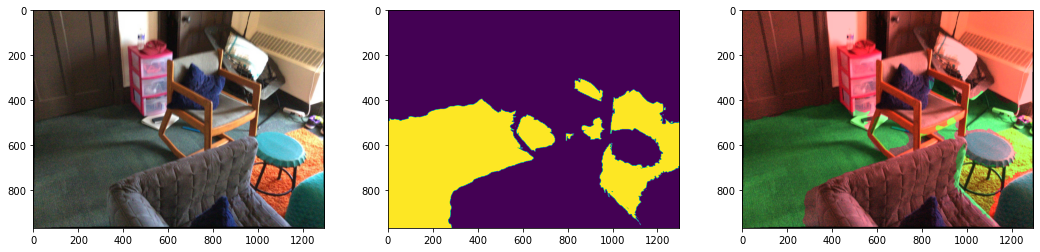

In [26]:
depth = np.load(f'{rootdir}/depths/{scan}/{fileidx}.npy')/1000.0
rgb = cv2.cvtColor(cv2.imread(f'{rootdir}/imgs/{scan}/{fileidx}.png', -1), cv2.COLOR_BGR2RGB)
sem = cv2.imread(f'{rootdir}/masks/{scan}/{fileidx}.png', -1)
pose = np.loadtxt(f'{rootdir}/poses/{scan}/{fileidx}.txt')

depth_K = np.loadtxt(f'{rootdir}/intrinsics/{scan}/intrinsic_depth.txt')
depth_invK = np.linalg.inv(depth_K)
depth_extrinsics = np.loadtxt(f'{rootdir}/intrinsics/{scan}/extrinsic_depth.txt')

floor_seg = np.isin(sem, [5]) * 1.0

seg_overlay = np.copy(rgb).astype(np.float32) / 255
seg_overlay *= 0.75
seg_overlay[floor_seg == 0, 0] *= 2
seg_overlay[floor_seg == 1, 1] *= 2
seg_overlay = np.clip(seg_overlay, a_min=0, a_max=1)

fig, ax = plt.subplots(ncols=3, figsize=(18, 4))
ax[0].imshow(rgb)
ax[1].imshow(floor_seg)
ax[2].imshow(seg_overlay)


In [27]:
y_vec = np.linalg.inv(pose[:3, :3]) @ np.array([0, 0, -1])
print(y_vec)
vertical = np.array([0, 1, 0])
cp = np.cross(y_vec, vertical)
cp_mag = np.linalg.norm(cp, ord=2) + 1e-6
angle = np.arcsin(cp_mag)

print(np.rad2deg(angle))

rotvec = angle * cp / cp_mag
    
rot_matrix = Rotation.from_rotvec(rotvec).as_matrix()
print(Rotation.from_matrix(rot_matrix).as_euler('xyz', degrees=True))

[-0.12121025  0.88003911  0.45917388]
28.35308013754199
[-27.34680403  -1.69643051  -6.96502379]


(307200, 3)
[[-1.27919719  0.          0.        ]
 [ 1.55104608  1.39182308  3.61573604]]
[1.81191596 1.74705127 4.7472672 ]


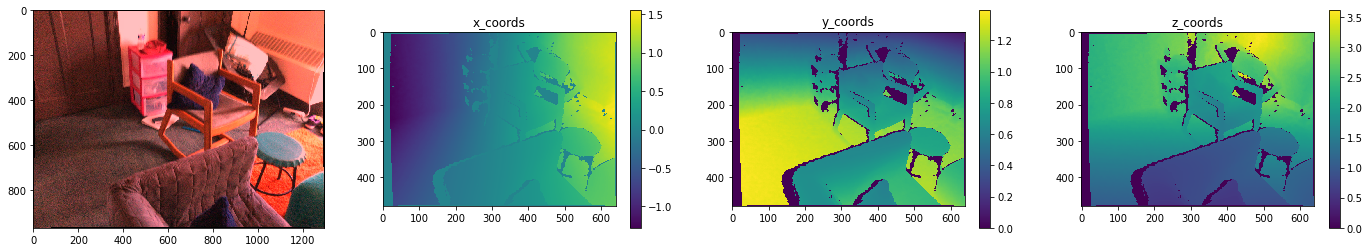

In [28]:
pcd = img_to_lid(depth, depth_K)
print(pcd.shape)

# pcd = pose @ np.concatenate([pcd, np.ones((pcd.shape[0], 1))], axis=1).T
pcd = rot_matrix @ pcd.T
t = rot_matrix @ np.linalg.inv(pose[:3, :3]) @ -pose[:3, 3]

print(np.percentile(pcd, [0, 100], axis=1))
print(t)

height_thresh = 0.2, 1.5
H, W = depth.shape

high_filter_idx = t[1] - pcd[1] < height_thresh[1]
low_filter_idx = t[1] - pcd[1] > height_thresh[0]

floor_mask = np.logical_and(high_filter_idx, ~low_filter_idx).reshape((H, W)) * 1.0

resized_mask = cv2.resize(floor_mask, dsize=floor_seg.shape[::-1], interpolation=cv2.INTER_NEAREST)
seg_overlay = np.copy(rgb).astype(np.float32) / 255
seg_overlay *= 0.75
seg_overlay[resized_mask == 0, 0] *= 2
seg_overlay[resized_mask == 1, 1] *= 2
seg_overlay = np.clip(seg_overlay, a_min=0, a_max=1)

fig, ax = plt.subplots(ncols=4, figsize=(24,4))
ax[0].imshow(seg_overlay, interpolation='none')

x_coords = ax[1].imshow(pcd[0].reshape((H,W)), interpolation='none')
ax[1].set_title('x_coords')
fig.colorbar(x_coords, ax=ax[1])

y_coords = ax[2].imshow(pcd[1].reshape((H,W)), interpolation='none')
ax[2].set_title('y_coords')
plt.colorbar(y_coords, ax=ax[2])

z_coords = ax[3].imshow(pcd[2].reshape((H,W)), interpolation='none')
ax[3].set_title('z_coords')
plt.colorbar(z_coords, ax=ax[3])

In [29]:
# To visualize the pcd
# pcd = img_to_lid(depth, depth_K)
# pcd = rot_matrix @ pcd.T

# frm = pd.DataFrame(data=pcd.T[:, :3],columns=["X", "Y", "Z"])

# fig = px.scatter_3d(frm, x='X', y='Y', z='Z', color='Z')
# fig.show()

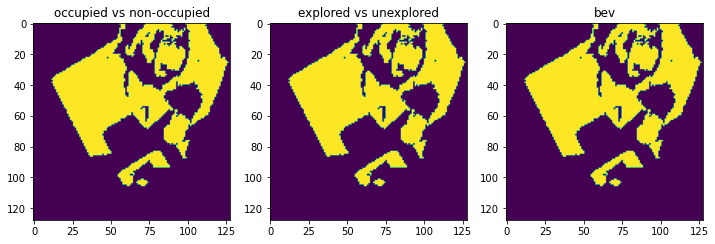

In [30]:
V = cfg.bev_width
Vby2 = V // 2
map_scale = 3.2 / V
height_thresh = 0.2, 1.5

pcd = img_to_lid(depth, depth_K)
t = rot_matrix @ np.linalg.inv(pose[:3, :3]) @ -pose[:3, 3]

points = (rot_matrix @ pcd.T).T

grid_x = ((points[:, 0] / map_scale) + Vby2)
grid_y = ((-points[:, 2] / map_scale) + V)

# Filter out invalid points
valid_idx = (
    (grid_x >= 0) & (grid_x <= V - 1) & (grid_y >= 0) & (grid_y <= V - 1)
)

points = points[valid_idx, :]
grid_x = grid_x[valid_idx].astype(int)
grid_y = grid_y[valid_idx].astype(int)

obstacle_mat = np.zeros((V, V), np.uint8)
explore_mat = np.zeros((V, V), np.uint8)

high_filter_idx = t[1] - points[:, 1] < height_thresh[1]
low_filter_idx = t[1] - points[:, 1] > height_thresh[0]

obstacle_idx = np.logical_and(low_filter_idx, high_filter_idx)
obstacle_mat[grid_y[obstacle_idx], grid_x[obstacle_idx]] = 1

explored_idx = high_filter_idx
explore_mat[grid_y[explored_idx], grid_x[explored_idx]] = 1

bev_map = np.zeros((V, V), np.uint8)
bev_map[np.logical_and(obstacle_mat==1, explore_mat==1)] = 127
bev_map[np.logical_and(obstacle_mat==0, explore_mat==1)] = 254

fig, ax = plt.subplots(ncols=3, figsize=(12, 4))
ax[0].imshow(obstacle_mat)
ax[0].set_title('occupied vs non-occupied')
ax[1].imshow(explore_mat)
ax[1].set_title('explored vs unexplored')
ax[2].imshow(bev_map)
ax[2].set_title('bev')

plt.show()

# Extract visible occupancy using chandrakar's method

968 1296


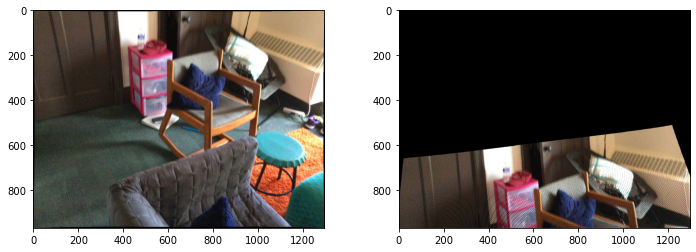

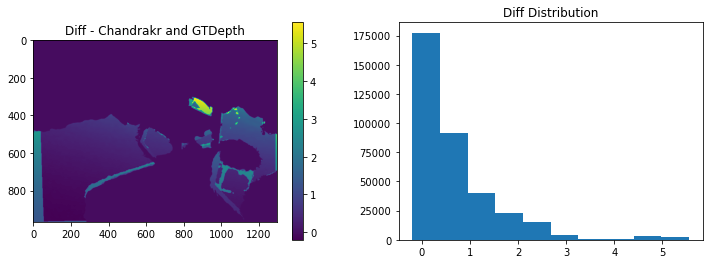

In [31]:
org_shape = sem.shape
cam_height = t[1]
h, w = sem.shape
print(h, w)

color_K = np.loadtxt(f'{rootdir}/intrinsics/{scan}/intrinsic_color.txt')
color_invK = np.linalg.inv(color_K)
color_extrinsics = np.loadtxt(f'{rootdir}/intrinsics/{scan}/extrinsic_color.txt')

f = color_K[1, 1]

img_rect = np.concatenate([np.indices((w, h)), np.ones((1, w, h))], axis=0) # 3,w,h

pc_proj = color_invK[:3, :3] @ img_rect.reshape((3, -1))

warped_img_rect = (color_K[:3, :3] @ rot_matrix @ pc_proj)
warped_img_rect /= warped_img_rect[2]

# Warp rgb image to visualize realignment
valid_idx = ((warped_img_rect[0] >=0) & (warped_img_rect[0] <w) &
             (warped_img_rect[1] >=0) & (warped_img_rect[1] <h))

src_x = img_rect.reshape((3, -1))[0, valid_idx].astype(int)
src_y = img_rect.reshape((3, -1))[1, valid_idx].astype(int)

tgt_x = warped_img_rect[0, valid_idx].astype(int)
tgt_y = warped_img_rect[1, valid_idx].astype(int)

warped_color = np.zeros_like(rgb)
warped_color[tgt_y, tgt_x] = rgb[src_y, src_x]

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].imshow(rgb)
ax[1].imshow(warped_color)

# Use the new y-coordinates to compute depth using chandrakar's formula
depth_pred = (cam_height * f / (warped_img_rect[1] - h/2 + 1e-6))

chandrakar_depth = depth_pred.reshape((w,h)).T * floor_seg
masked_depth = cv2.resize(depth, dsize=floor_seg.shape[::-1], interpolation=cv2.INTER_NEAREST) * floor_seg

diff = chandrakar_depth - masked_depth

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
img_diff = ax[0].imshow(diff)
ax[0].set_title('Diff - Chandrakr and GTDepth')
fig.colorbar(img_diff, ax=ax[0])

diff = diff[(floor_seg != 0)]
ax[1].hist(diff)
ax[1].set_title('Diff Distribution')

plt.show()

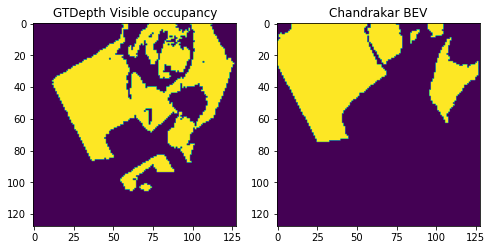

Mean IU (Free): 0.000000


In [32]:
V = 128
Vby2 = V // 2
map_scale = 3.2 / V
height_thresh = 0.2, 1.5

aligned_pc_proj = rot_matrix @ pc_proj
aligned_pc_proj /= aligned_pc_proj[2]

points = (chandrakar_depth.T.reshape(-1) * aligned_pc_proj).T #[chandrakar_depth.reshape(-1) != 0, :]
t = rot_matrix @ np.linalg.inv(pose[:3, :3]) @ -pose[:3, 3]

grid_x = ((points[:, 0] / map_scale) + Vby2)
grid_y = ((-points[:, 2] / map_scale) + V)

# Filter out invalid points
valid_idx = (
    (grid_x >= 0) & (grid_x <= V - 1) & (grid_y >= 0) & (grid_y <= V - 1)
)

points = points[valid_idx, :]
grid_x = grid_x[valid_idx].astype(int)
grid_y = grid_y[valid_idx].astype(int)

obstacle_mat = np.zeros((V, V), np.uint8)
explore_mat = np.zeros((V, V), np.uint8)

high_filter_idx = t[1] - points[:, 1] < height_thresh[1]
low_filter_idx = t[1] - points[:, 1] > height_thresh[0]

obstacle_idx = np.logical_and(low_filter_idx, high_filter_idx)
obstacle_mat[grid_y[obstacle_idx], grid_x[obstacle_idx]] = 1

explored_idx = high_filter_idx
explore_mat[grid_y[explored_idx], grid_x[explored_idx]] = 1

chandrakar_bev = np.zeros((V, V), np.uint8)
chandrakar_bev[np.logical_and(obstacle_mat==1, explore_mat==1)] = 127
chandrakar_bev[np.logical_and(obstacle_mat==0, explore_mat==1)] = 254

fig, ax = plt.subplots(ncols=2, figsize=(8, 4))
ax[0].imshow(bev_map)
ax[0].set_title('GTDepth Visible occupancy')
ax[1].imshow(chandrakar_bev)
ax[1].set_title('Chandrakar BEV')

plt.show()

x_ij = np.sum(np.logical_and(bev_map == 254, chandrakar_bev==254))
t_ii = np.sum(bev_map == 254)
t_jj = np.sum(chandrakar_bev == 254)
IU = x_ij / (t_ii + t_jj - x_ij)
print('Mean IU (Free): {:02f}'.format(IU))

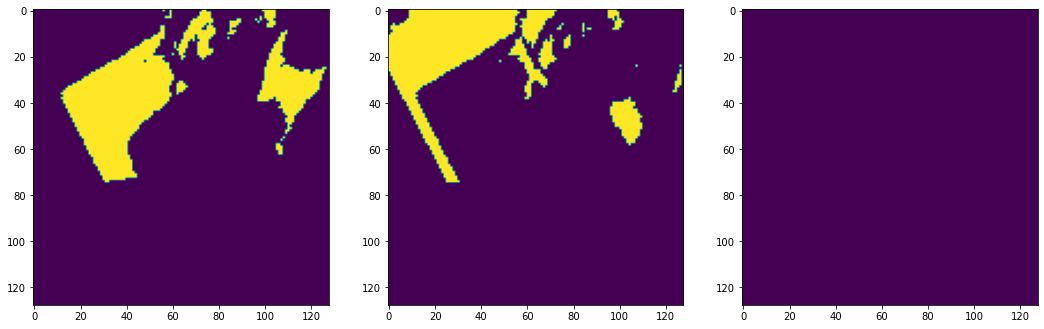

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(18, 6))
ax[0].imshow(np.logical_and(bev_map==127, chandrakar_bev==254))
ax[1].imshow(np.logical_and(bev_map==0, chandrakar_bev==254))
ax[2].imshow(np.logical_and(bev_map==254, chandrakar_bev==0))


# Overlay occupancy map on perspective view

In [48]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

import concurrent.futures

from multiprocessing import Pool

In [49]:
def get_seg_map(depth, bev, K, rot_matrix):
    inv_K = np.linalg.inv(K[:3,:3])

    h, w = depth.shape

    img_rect = np.concatenate([np.indices((w, h)), np.ones((1, w, h))], axis=0)

    pc = (inv_K @ img_rect.reshape((3, -1))).reshape((3, w, h))
    pc = pc.transpose((0,2,1)) * depth
    pc = rot_matrix @ pc.reshape((3, -1))

    pc = np.concatenate([pc, np.ones((1, h*w))], axis=0)

    bev_size = (3.2, 3.2) # m
    bev_res = bev_size[0] / bev.shape[0]
    
    cam_to_agent = np.eye(4)
#     cam_to_agent[0, 3] = -0.1
#     cam_to_agent[2, 3] = -0.1

    T = np.zeros((4, 4))
    T[0,0] = 1
    T[1,2] = -1
    T[2,1] = 1
    T[3,3] = 1
    T[0,3] = 1.6
    T[1,3] = 3.2

    ortho_cam_points = (T @ cam_to_agent @ pc) // bev_res
    valid = (ortho_cam_points[0] >= 0) & (ortho_cam_points[0] < bev.shape[1]) & (ortho_cam_points[1] >= 0) & (ortho_cam_points[1] < bev.shape[0]) & (ortho_cam_points[2] >= 0)

    pt_bev_indices = (ortho_cam_points[1, valid]*bev.shape[1] + ortho_cam_points[0, valid]).astype(int)
    pt_bev_cls = np.take(bev.reshape(-1), pt_bev_indices)

    seg_map = np.zeros(w * h, dtype=np.uint8)
    seg_map[valid] = pt_bev_cls
    seg_map = seg_map.reshape((h, w))
    
    return seg_map

(64, 64) [  0 127 254]


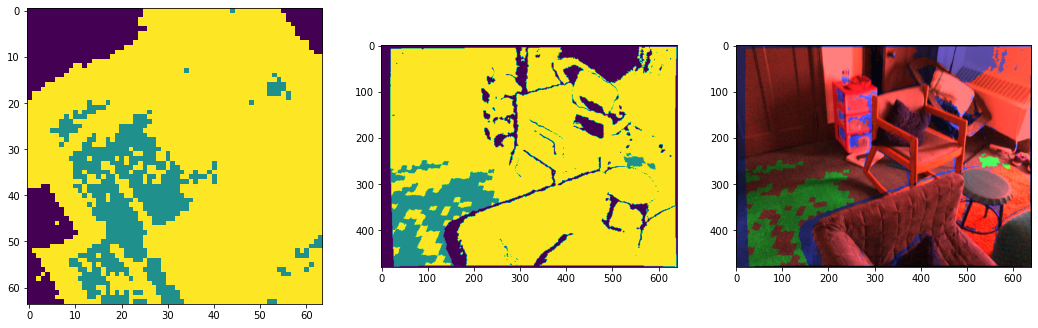

In [51]:
full_occ = cv2.imread(f'{rootdir}/maps/local/{scan}/{fileidx}.png', -1)[..., 0]
# plt.imshow(full_occ)
print(full_occ.shape, np.unique(full_occ))

seg_mask = get_seg_map(depth, full_occ, depth_K, rot_matrix)

seg_overlay = np.copy(rgb).astype(np.float32) / 255
seg_overlay = cv2.resize(seg_overlay, depth.shape[::-1])
seg_overlay *= 0.5
seg_overlay[seg_mask//127 == 2, 0] *= 3
seg_overlay[seg_mask//127 == 1, 1] *= 3
seg_overlay[seg_mask//127 == 0, 2] *= 3
seg_overlay = np.clip(seg_overlay, a_min=0, a_max=1)

fig, ax = plt.subplots(ncols=3, figsize=(18, 6))
ax[0].imshow(full_occ, interpolation='None')
ax[1].imshow(seg_mask)
ax[2].imshow(seg_overlay)

In [52]:
def save_video(scan):
    num_frames = len(os.listdir(f'{rootdir}/imgs/{scan}'))
    fps = 3
    duration = num_frames / fps
    print(scan, duration, num_frames)
    fig, axes = plt.subplots(ncols=5, figsize=(30, 6))

    def get_frame(t):
        for ax in axes:
            ax.clear()
            
        fileidx = np.clip(int(t * fps), a_min=0, a_max=num_frames-1)
        
        depth = np.load(f'{rootdir}/depths/{scan}/{fileidx}.npy')/1000.0
        rgb = cv2.cvtColor(cv2.imread(f'{rootdir}/imgs/{scan}/{fileidx}.png', -1), cv2.COLOR_BGR2RGB)
        sem = cv2.imread(f'{rootdir}/masks/{scan}/{fileidx}.png', -1)
        pose = np.loadtxt(f'{rootdir}/poses/{scan}/{fileidx}.txt')

        depth_K = np.loadtxt(f'{rootdir}/intrinsics/{scan}/intrinsic_depth.txt')
        depth_invK = np.linalg.inv(depth_K)
        depth_extrinsics = np.loadtxt(f'{rootdir}/intrinsics/{scan}/extrinsic_depth.txt')
        
        y_vec = np.linalg.inv(pose[:3, :3]) @ np.array([0, 0, -1])
        vertical = np.array([0, 1, 0])
        cp = np.cross(y_vec, vertical)
        cp_mag = np.linalg.norm(cp, ord=2) + 1e-6
        angle = np.arcsin(cp_mag)
        rotvec = angle * cp / cp_mag

        rot_matrix = Rotation.from_rotvec(rotvec).as_matrix()
        
        bev = cv2.imread(f'{rootdir}/maps/local/{scan}/{fileidx}.png', -1)[..., 0]

        # Use bev from simulator to create floor segmentation map
        seg_mask = get_seg_map(depth, bev, depth_K, rot_matrix)
        bev_seg_overlay = np.copy(rgb).astype(np.float32) / 255
        bev_seg_overlay = cv2.resize(bev_seg_overlay, depth.shape[::-1])
        bev_seg_overlay *= 0.5
        bev_seg_overlay[seg_mask//127 == 2, 0] *= 3
        bev_seg_overlay[seg_mask//127 == 1, 1] *= 3
        bev_seg_overlay[seg_mask//127 == 0, 2] *= 3
        bev_seg_overlay = np.clip(bev_seg_overlay, a_min=0, a_max=1)

        floor_seg = np.isin(sem, [5]) * 1.0

        gt_seg_overlay = np.copy(rgb).astype(np.float32) / 255
        gt_seg_overlay *= 0.75
        gt_seg_overlay[floor_seg == 0, 0] *= 2
        gt_seg_overlay[floor_seg == 1, 1] *= 2
        gt_seg_overlay = cv2.resize(gt_seg_overlay, depth.shape[::-1])
        gt_seg_overlay = np.clip(gt_seg_overlay, a_min=0, a_max=1)
        
        imgs = ['rgb', 'depth', 'bev', 'bev_seg_overlay', 'gt_seg_overlay']
        for ax_idx, ax in enumerate(axes):
            ax.imshow(eval(imgs[ax_idx]))
            ax.set_title(imgs[ax_idx], fontsize= 30)
            ax.axis('off')
            ax.margins(0)
            
        fig.tight_layout(pad=1)
        fig.canvas.draw()

        return mplfig_to_npimage(fig)


    animation = VideoClip(get_frame, duration = duration)
    animation.write_videofile(f'{out_dir}/{scan}.mp4', fps=fps)

In [53]:
rootdir = '/scratch/scannet_data'
out_dir='/scratch/shantanu/scannet_videos'
os.makedirs(out_dir, exist_ok=True)

scans = os.listdir(rootdir + '/imgs')[:10]
# save_video('scene0005_01')

with Pool(processes=18) as pool:
    pool.map(save_video, scans)


scene0002_00scene0011_00scene0055_01scene0013_02scene0033_00scene0016_02scene0010_01scene0036_01scene0030_02   346.3333333333333     158.33333333333334 77.33333333333333 128.3333333333333447.66666666666666491.0 118.6666666666666795.062.6666666666666641039   475    232
385143
273285356188






scene0042_02 73.33333333333333 220
Moviepy - Building video /scratch/shantanu/scannet_videos/scene0042_02.mp4.
Moviepy - Writing video /scratch/shantanu/scannet_videos/scene0042_02.mp4

Moviepy - Building video /scratch/shantanu/scannet_videos/scene0010_01.mp4.
Moviepy - Writing video /scratch/shantanu/scannet_videos/scene0010_01.mp4

Moviepy - Building video /scratch/shantanu/scannet_videos/scene0011_00.mp4.
Moviepy - Writing video /scratch/shantanu/scannet_videos/scene0011_00.mp4

Moviepy - Building video /scratch/shantanu/scannet_videos/scene0002_00.mp4.
Moviepy - Writing video /scratch/shantanu/scannet_videos/scene0002_00.mp4

Moviepy - Building video /scratch/shantanu/scannet_videos/scene003

t:  53%|███████████████████████████████████████████████                                         | 146/273 [02:11<01:53,  1.12it/s, now=None]

Moviepy - Done !
Moviepy - video ready /scratch/shantanu/scannet_videos/scene0036_01.mp4


t:  22%|██████████████████▊                                                                    | 224/1039 [03:18<11:58,  1.13it/s, now=None]

Moviepy - Done !
Moviepy - video ready /scratch/shantanu/scannet_videos/scene0042_02.mp4


t:  57%|█████████████████████████████████████████████████▋                                      | 269/476 [03:54<02:47,  1.24it/s, now=None]

Moviepy - Done !
Moviepy - video ready /scratch/shantanu/scannet_videos/scene0010_01.mp4


t:  37%|████████████████████████████████▌                                                      | 389/1039 [05:26<08:21,  1.30it/s, now=None]

Moviepy - Done !
Moviepy - video ready /scratch/shantanu/scannet_videos/scene0030_02.mp4


t:  46%|████████████████████████████████████████                                               | 478/1039 [06:29<06:30,  1.44it/s, now=None]

Moviepy - Done !
Moviepy - video ready /scratch/shantanu/scannet_videos/scene0011_00.mp4


Moviepy - Done !
Moviepy - video ready /scratch/shantanu/scannet_videos/scene0002_00.mp4


TypeError: 'NoneType' object is not subscriptable

# Preprocess and dump data for all scans

In [2]:
import sys
import os
import numpy as np
from scipy.spatial.transform import Rotation
import cv2
from multiprocessing.pool import Pool

In [3]:
def img_to_rect( u, v, depth_rect, P2):
    
    cu = P2[0, 2]
    cv = P2[1, 2]
    fu = P2[0, 0]
    fv = P2[1, 1]

    x = ((u - cu) * depth_rect) / fu
    y = ((v - cv) * depth_rect) / fv
    pts_rect = np.concatenate((x.reshape(-1, 1), y.reshape(-1, 1), depth_rect.reshape(-1, 1)), axis=1)
    return pts_rect

def img_to_lid(depth_map, cam_mat, label=None):

    x_range = np.arange(0, depth_map.shape[1])
    y_range = np.arange(0, depth_map.shape[0])
    x_idxs, y_idxs = np.meshgrid(x_range, y_range)
    x_idxs, y_idxs = x_idxs.reshape(-1), y_idxs.reshape(-1)

    depth = depth_map[y_idxs, x_idxs]
    pts_rect = img_to_rect(x_idxs, y_idxs, depth, cam_mat)
    
    if label is not None:
        label_intensity = label[y_idxs, x_idxs]
        filt = label_intensity == 2
        pts_rect = pts_rect[filt]

    return pts_rect

In [4]:
def generate_bevs(args):
    rootdir, scan, fileidx, bev_shape = args
    
    # Load imgs
    depth = np.load(f'{rootdir}/depths/{scan}/{fileidx}.npy')/1000.0
    rgb = cv2.cvtColor(cv2.imread(f'{rootdir}/imgs/{scan}/{fileidx}.png', -1), cv2.COLOR_BGR2RGB)
    sem = cv2.imread(f'{rootdir}/masks/{scan}/{fileidx}.png', -1)
    floor_seg = np.isin(sem, [5]) * 1.0
    pose = np.loadtxt(f'{rootdir}/poses/{scan}/{fileidx}.txt')
    
    # Load intrinsics        
    depth_K = np.loadtxt(f'{rootdir}/intrinsics/{scan}/intrinsic_depth.txt')
    depth_invK = np.linalg.inv(depth_K)
    color_K = np.loadtxt(f'{rootdir}/intrinsics/{scan}/intrinsic_color.txt')
    color_invK = np.linalg.inv(color_K)
    
    # Compute the rotation matrix for vertical alignment correction 
    y_vec = np.linalg.inv(pose[:3, :3]) @ np.array([0, 0, -1])
    vertical = np.array([0, 1, 0])
    cp = np.cross(y_vec, vertical)
    cp_mag = np.linalg.norm(cp, ord=2) + 1e-6
    angle = np.arcsin(cp_mag)
    rotvec = angle * cp / cp_mag
    rot_matrix = Rotation.from_rotvec(rotvec).as_matrix()
    
    # Get the position vector for ground offset w.r.t camera
    t = rot_matrix @ np.linalg.inv(pose[:3, :3]) @ -pose[:3, 3]
    
    # Set params for bev
    V = bev_shape[0]
    Vby2 = bev_shape[1] // 2
    map_scale = 3.2 / V
    height_thresh = 0.2, 1.5
    
    # Write GTDepth Visible occupancy
    pcd = img_to_lid(depth, depth_K)

    points = (rot_matrix @ pcd.T).T

    grid_x = ((points[:, 0] / map_scale) + Vby2)
    grid_y = ((-points[:, 2] / map_scale) + V)

    valid_idx = (
        (grid_x >= 0) & (grid_x <= V - 1) & (grid_y >= 0) & (grid_y <= V - 1)
    )

    points = points[valid_idx, :]
    grid_x = grid_x[valid_idx].astype(int)
    grid_y = grid_y[valid_idx].astype(int)

    obstacle_mat = np.zeros((V, V), np.uint8)
    explore_mat = np.zeros((V, V), np.uint8)

    high_filter_idx = t[1] - points[:, 1] < height_thresh[1]
    low_filter_idx = t[1] - points[:, 1] > height_thresh[0]

    obstacle_idx = np.logical_and(low_filter_idx, high_filter_idx)
    obstacle_mat[grid_y[obstacle_idx], grid_x[obstacle_idx]] = 1

    explored_idx = high_filter_idx
    explore_mat[grid_y[explored_idx], grid_x[explored_idx]] = 1

    bev_map = np.zeros((V, V), np.uint8)
    bev_map[np.logical_and(obstacle_mat==1, explore_mat==1)] = 127
    bev_map[np.logical_and(obstacle_mat==0, explore_mat==1)] = 254
    
    save_path = f'{rootdir}/gtvo/{scan}/{fileidx}.png'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    cv2.imwrite(save_path, bev_map)
    
    # Write Chandrakar BEV
    cam_height = t[1]
    h, w = sem.shape

    f = color_K[1, 1]

    img_rect = np.concatenate([np.indices((w, h)), np.ones((1, w, h))], axis=0) # 3,w,h

    pc_proj = color_invK[:3, :3] @ img_rect.reshape((3, -1))

    warped_img_rect = (color_K[:3, :3] @ rot_matrix @ pc_proj)
    warped_img_rect /= warped_img_rect[2]
    
    depth_pred = (cam_height * f / (warped_img_rect[1] - h/2 + 1e-6))
    chandrakar_depth = depth_pred.reshape((w,h)).T * floor_seg
    
    save_path = f'{rootdir}/chandrakardepth/{scan}/{fileidx}.png'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    cv2.imwrite(save_path, (chandrakar_depth * 1000).astype(np.uint16))

    aligned_pc_proj = rot_matrix @ pc_proj
    aligned_pc_proj /= aligned_pc_proj[2]

    points = (chandrakar_depth.T.reshape(-1) * aligned_pc_proj).T #[chandrakar_depth.reshape(-1) != 0, :]

    grid_x = ((points[:, 0] / map_scale) + Vby2)
    grid_y = ((-points[:, 2] / map_scale) + V)

    # Filter out invalid points
    valid_idx = (
        (grid_x >= 0) & (grid_x <= V - 1) & (grid_y >= 0) & (grid_y <= V - 1)
    )

    points = points[valid_idx, :]
    grid_x = grid_x[valid_idx].astype(int)
    grid_y = grid_y[valid_idx].astype(int)

    obstacle_mat = np.zeros((V, V), np.uint8)
    explore_mat = np.zeros((V, V), np.uint8)

    high_filter_idx = t[1] - points[:, 1] < height_thresh[1]
    low_filter_idx = t[1] - points[:, 1] > height_thresh[0]

    obstacle_idx = np.logical_and(low_filter_idx, high_filter_idx)
    obstacle_mat[grid_y[obstacle_idx], grid_x[obstacle_idx]] = 1

    explored_idx = high_filter_idx
    explore_mat[grid_y[explored_idx], grid_x[explored_idx]] = 1

    chandrakar_bev = np.zeros((V, V), np.uint8)
    chandrakar_bev[np.logical_and(obstacle_mat==1, explore_mat==1)] = 127
    chandrakar_bev[np.logical_and(obstacle_mat==0, explore_mat==1)] = 254
    
    save_path = f'{rootdir}/chandrakarbev/{scan}/{fileidx}.png'
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    cv2.imwrite(save_path, chandrakar_bev)
    


In [5]:
rootdir='/scratch/scannet_data'
bev_shape = (128, 128)

scans = os.listdir(f'{rootdir}/imgs')

fn_args = []

for scan in scans:
    tmp = map(lambda x : (rootdir, scan, int(os.path.splitext(x)[0]), bev_shape), 
              os.listdir(os.path.join(rootdir, 'imgs', scan)))
    tmp = sorted(list(tmp), key=lambda x: x[2])
    fn_args.extend(tmp)
    
print(len(fn_args))
print(fn_args[0])

FileNotFoundError: [Errno 2] No such file or directory: '/scratch/scannet_data/imgs'

In [12]:
with Pool(processes=10) as pool:
    pool.map(generate_bevs, fn_args)